<a href="https://colab.research.google.com/github/Zaier9/Procesamiento-del-lenguaje-natural/blob/master/Estadisticas_del_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuracion inicial

*   En este notebook vamos a descargar el dataset book que contiene muchos libros en inglés en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

# Analizando texto

In [28]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [29]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [30]:
len(text1)

260819

# Medida de riqueza lexica en un texto:
            total de palabras únicas   longitud de vocabuliario
      R1   _________________________ = _________________________
            total de plabaras             longitud de texto

In [31]:
# Primero realizamos la construccion de un vocabulario(identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [32]:
# rl = Riqueza Lexica
rl = len(vocabulario) / len(text1)
print(rl)

0.07406285585022564


In [33]:
def riqueza_lexica(texto):
  vocabulario = sorted(set(text1))
  return len(vocabulario) / len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [34]:
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

porcentaje_palabra('monster', text1)

0.018786974875296663

In [35]:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.


*   Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.
*   Ejemplo dic = {'monster': 49, 'boat': 54, ...}



In [ ]:
# El ciclo for tiene un costo computacional alto, no es recomedable
dic = {}
for palabra in set(text1):
  dic[palabra] = text1.count(palabra)
dic

# Método FreqDist de NLTK

In [37]:
fdist = FreqDist(text1)

In [38]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

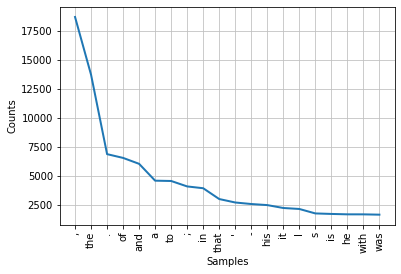

In [39]:
fdist.plot(20)

In [40]:
fdist['monster']

49

# Distribuciones sobre contenido con filtro-fino


*   Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que más información nos arrojan sobre el contenido del mismo.
*   Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales.



In [45]:
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir con una lista de tuplas, basados en los conteos ya pre-calculados de la función FreqDist, así:

fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]

Luego podemos convertir el objeto creado a formato de np.array de **Numpy** para poder hacer un sort por palabras más frecuentes.

fdist_filtrado = np.array(fdist_filtrado, *args)
np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]

In [53]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype = dtypes)
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

In [54]:
# Construccion de un grafico de barras customizado con Matplotlib

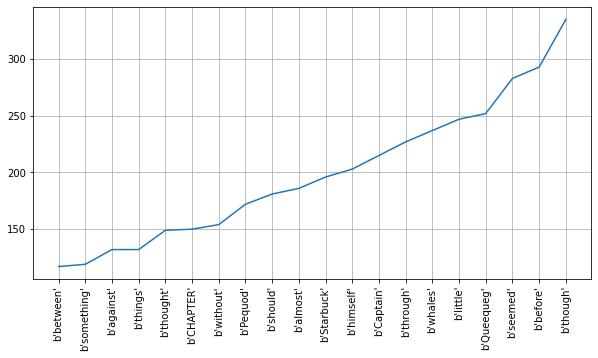

In [56]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()